#CREDIT CARD FRAUD DETECTION SYSTEM

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [3]:
credit_card = pd.read_csv('/content/creditcard.csv')

In [4]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3968,3617,1.134592,0.252051,0.488592,0.799826,-0.264819,-0.369918,-0.243365,0.049761,1.210818,...,-0.351115,-0.851463,0.186169,0.092463,0.020015,0.057976,-0.046611,0.012562,13.99,0.0
3969,3621,-1.338671,1.080974,1.291196,0.719258,0.101320,0.053896,0.001297,-0.917575,1.638510,...,0.498030,-0.483932,0.037686,0.053566,-0.560078,0.230423,-0.119911,0.321847,27.43,0.0
3970,3622,-0.339728,-2.417449,0.975517,2.537995,-1.720361,0.863005,0.032965,0.026764,2.487139,...,0.391639,0.264432,-0.735031,0.450594,0.310022,-0.231357,-0.049872,0.153526,730.32,0.0
3971,3623,-0.368639,0.947432,1.707755,0.932092,0.292956,0.189100,0.499330,0.132466,0.779412,...,-0.119045,0.056665,-0.172703,0.170073,0.139605,-0.420518,0.033794,0.005996,6.87,0.0
3972,3624,-0.663445,1.162921,1.508050,0.549405,0.231377,-0.106041,0.817977,-0.387026,1.488054,...,-0.420337,-0.361357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

In [7]:
credit_card.shape

(3973, 31)

In [8]:
credit_card.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3969,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3970,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3971,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
credit_card.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3610,0.816969,-0.280175,1.354064,2.859548,-0.792255,0.723782,-0.662957,0.298866,1.372479,...,-0.133302,-0.433181,-0.111095,-0.108651,0.181549,-0.089374,-0.026460,0.038635,150.91,0.0
3968,3617,1.134592,0.252051,0.488592,0.799826,-0.264819,-0.369918,-0.243365,0.049761,1.210818,...,-0.351115,-0.851463,0.186169,0.092463,0.020015,0.057976,-0.046611,0.012562,13.99,0.0
3969,3621,-1.338671,1.080974,1.291196,0.719258,0.101320,0.053896,0.001297,-0.917575,1.638510,...,0.498030,-0.483932,0.037686,0.053566,-0.560078,0.230423,-0.119911,0.321847,27.43,0.0
3970,3622,-0.339728,-2.417449,0.975517,2.537995,-1.720361,0.863005,0.032965,0.026764,2.487139,...,0.391639,0.264432,-0.735031,0.450594,0.310022,-0.231357,-0.049872,0.153526,730.32,0.0


In [10]:
#distribution of legit and fradulent transactions
credit_card['Class'].value_counts()

0.0    3970
1.0       2
Name: Class, dtype: int64

In [11]:
#seperating the data for data analysis
legit = credit_card[credit_card.Class == 0]
fraud = credit_card[credit_card['Class'] == 1]

In [12]:
legit.value_counts()

Time  V1         V2         V3         V4         V5         V6         V7         V8         V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21        V22        V23        V24        V25        V26        V27        V28        Amount  Class
1548  -1.559446   1.425546   0.812589  -1.129381   0.507528   0.183507   0.654304   0.088059   0.480018   0.547216   0.066070   1.065234   0.982424  -0.609124  -1.381521   0.189597  -0.901688   0.025998   0.560580   0.451195  -0.283995  -0.413642  -0.234995  -0.789509   0.324851   0.419737   0.329608   0.351346  5.00    0.0      4
74     1.038370   0.127486   0.184456   1.109950   0.441699   0.945283  -0.036715   0.350995   0.118950  -0.243289   0.578063   0.674730  -0.534231   0.446601   1.122885  -1.768001   1.241157  -2.449500  -1.747255  -0.335520   0.102520   0.605089   0.023092  -0.626463   0.479120  -0.166937   0.081247   0.001192  1.18    0.0      4
2270  

In [13]:
fraud.value_counts()

Time  V1         V2         V3         V4        V5         V6         V7         V8         V9         V10        V11        V12        V13        V14        V15       V16        V17        V18        V19       V20       V21       V22        V23        V24        V25       V26        V27        V28        Amount  Class
406   -2.312227   1.951992  -1.609851  3.997906  -0.522188  -1.426545  -2.537387   1.391657  -2.770089  -2.772272   3.202033  -2.899907  -0.595222  -4.289254  0.389724  -1.140747  -2.830056  -0.016822  0.416956  0.126911  0.517232  -0.035049  -0.465211   0.320198  0.044519   0.177840   0.261145  -0.143276  0.0     1.0      1
472   -3.043541  -3.157307   1.088463  2.288644   1.359805  -1.064823   0.325574  -0.067794  -0.270953  -0.838587  -0.414575  -0.503141   0.676502  -1.692029  2.000635   0.666780   0.599717   1.725321  0.283345  2.102339  0.661696   0.435477   1.375966  -0.293803  0.279798  -0.145362  -0.252773   0.035764  529.0   1.0      1
dtype: int64

In [14]:
print(legit.shape)
print(fraud.shape)

(3970, 31)
(2, 31)


In [15]:
#statistical measures of the data
legit.Amount.describe()

count    3970.000000
mean       64.899597
std       213.612570
min         0.000000
25%         2.270000
50%        12.990000
75%        54.990000
max      7712.430000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64

In [17]:
#comparing the values for both transactions
credit_card.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1638.828463,-0.332459,0.308935,0.837446,0.011432,-0.029468,0.053530,0.147357,-0.071642,0.056211,...,0.059567,0.010282,-0.082957,-0.058743,0.029114,0.095244,-0.012637,0.044658,0.002668,64.899597
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


- Building a sample dataset for both legit and fradulent transactions
-as no of fradulent transactions = 492

In [18]:
legit_sam = legit.sample(n = 492)

In [19]:
# combing both dataframes
new_credit = pd.concat([legit_sam,fraud],axis = 0)

In [20]:
new_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3140,2716,-2.573285,-0.406929,-0.190687,1.294770,-0.736969,1.420454,1.005098,1.011959,-0.988296,...,0.344006,1.038373,0.896101,-0.610667,-0.407939,-0.210993,0.225651,-0.526145,312.39,0.0
2760,2299,-0.449091,1.011487,1.756903,-0.148778,0.094598,-0.846753,1.084048,-0.465112,0.175563,...,-0.369136,-0.612276,-0.080785,0.341421,-0.214287,0.021269,0.043043,-0.267499,9.51,0.0
2344,1888,-1.927141,1.368220,3.493593,2.623211,-0.162567,2.242269,-0.232400,-2.199345,2.524051,...,1.042135,0.217449,-0.265089,-0.428025,0.502873,0.471720,-0.010046,-0.927002,0.00,0.0
1251,966,1.189401,0.270214,0.401474,0.726123,-0.397897,-0.803702,-0.024969,-0.051676,0.098257,...,-0.245433,-0.705344,0.206217,0.343456,0.079239,0.105938,-0.010164,0.029444,1.98,0.0
3368,2912,1.357077,-0.193785,-0.517350,-1.246472,-0.037901,-0.524172,-0.046283,-0.034692,1.075581,...,0.000773,0.053417,-0.282324,-0.853258,0.880898,-0.541363,0.025465,-0.007292,1.00,0.0


In [21]:
new_credit.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
631,480,1.039079,1.158034,-1.555174,1.500270,1.556148,0.036028,0.499065,0.148227,-0.603040,...,-0.060672,0.113742,-0.049555,-0.940148,0.525324,-0.188411,0.116878,0.087125,0.75,0.0
3594,3073,1.188739,-0.110925,-0.247423,-0.056450,-0.230669,-0.884735,0.252123,-0.107019,-0.128072,...,-0.339530,-1.248046,0.070858,-0.003754,0.148766,0.706722,-0.132117,-0.008134,58.92,0.0
718,541,-0.623525,0.176955,2.565715,1.544280,0.109686,0.055218,0.259801,-0.192566,-0.320106,...,0.387800,1.408297,0.019451,0.545551,-1.357580,-0.332164,-0.138540,-0.200151,67.10,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0


In [22]:
new_credit['Class'].value_counts()

0.0    492
1.0      2
Name: Class, dtype: int64

In [23]:
new_credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1656.359756,-0.376483,0.330176,0.847280,0.003812,0.001219,0.087309,0.171699,-0.137974,0.119323,...,-0.001528,0.082709,-0.059627,-0.047760,0.046459,0.089912,-0.017019,0.039342,-0.003598,61.802967
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


#Splitting Data
- X = features
- y  = targets

In [24]:
X = new_credit.drop(columns = 'Class',axis = 1)
y = new_credit['Class']

In [25]:
print(X)

      Time        V1        V2        V3        V4        V5        V6  \
3140  2716 -2.573285 -0.406929 -0.190687  1.294770 -0.736969  1.420454   
2760  2299 -0.449091  1.011487  1.756903 -0.148778  0.094598 -0.846753   
2344  1888 -1.927141  1.368220  3.493593  2.623211 -0.162567  2.242269   
1251   966  1.189401  0.270214  0.401474  0.726123 -0.397897 -0.803702   
3368  2912  1.357077 -0.193785 -0.517350 -1.246472 -0.037901 -0.524172   
...    ...       ...       ...       ...       ...       ...       ...   
631    480  1.039079  1.158034 -1.555174  1.500270  1.556148  0.036028   
3594  3073  1.188739 -0.110925 -0.247423 -0.056450 -0.230669 -0.884735   
718    541 -0.623525  0.176955  2.565715  1.544280  0.109686  0.055218   
541    406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   

            V7        V8        V9  ...       V20       V21       V22  \
3140  1.005098  1.011959 -0.988296  ..

In [26]:
print(y)

3140    0.0
2760    0.0
2344    0.0
1251    0.0
3368    0.0
       ... 
631     0.0
3594    0.0
718     0.0
541     1.0
623     1.0
Name: Class, Length: 494, dtype: float64


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 2)

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(494, 30) (395, 30) (99, 30)


# Training a Model

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

In [32]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
X_train_pred = model.predict(X_train)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
acc = accuracy_score(X_train_pred,y_train)
print(acc)

1.0


In [36]:
X_test_pred = model.predict(X_test)

In [37]:
acc = accuracy_score(X_test_pred,y_test)
print(acc)

1.0


In [38]:
cred = pd.DataFrame({"Actual":y_test.squeeze(),"Predicted":X_test_pred.squeeze()})

In [39]:
cred.head()

,Actual,Predicted
1123,0.0,0.0
2933,0.0,0.0
330,0.0,0.0
3333,0.0,0.0
2217,0.0,0.0


In [40]:
from sklearn.metrics import confusion_matrix

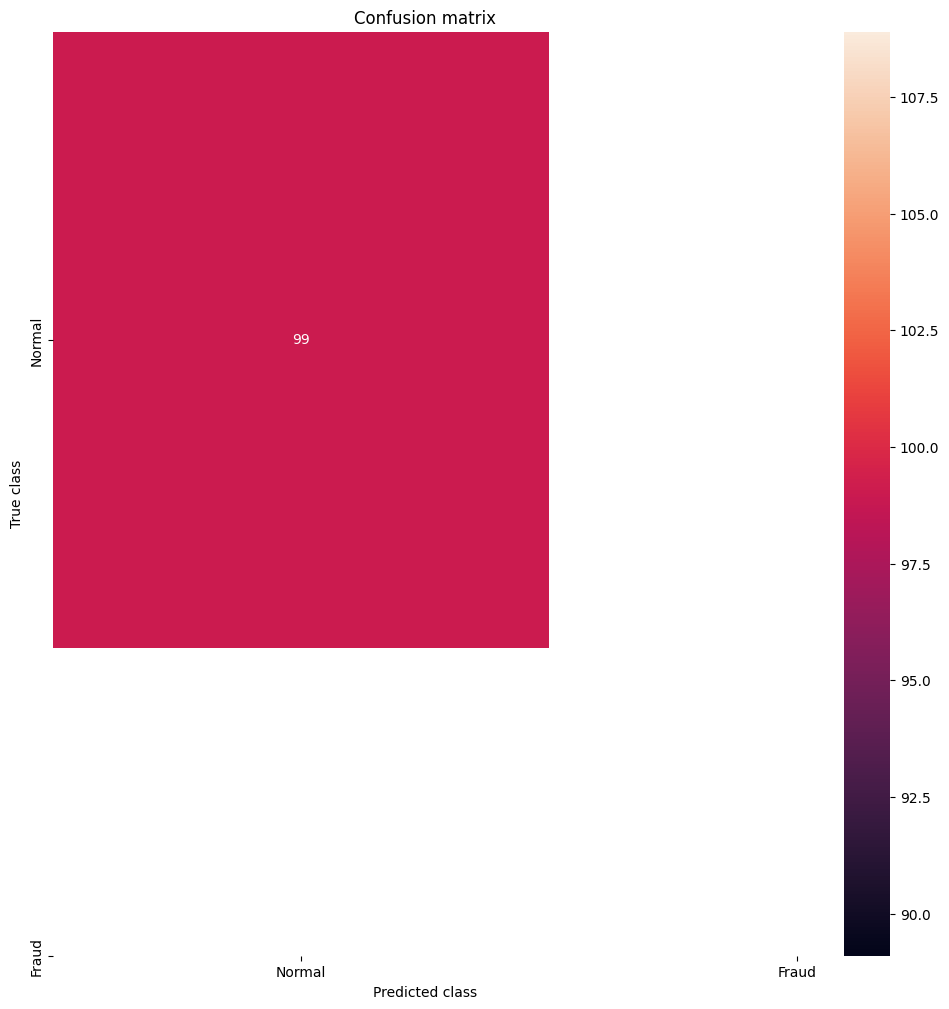

In [42]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, X_test_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()